# Census Income Project

In [38]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [39]:
df = pd.read_csv('census_income.csv', skipinitialspace=True)

In [40]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [41]:
df['annual_income'].value_counts()

<=50K    24720
>50K      7841
Name: annual_income, dtype: int64

In [42]:
df.shape

(32561, 15)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Checking for Null Values

In [44]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [45]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [46]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [47]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [48]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [49]:
df[df['native-country']=='?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [50]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values for {column}: {unique_values}')
    print()


Unique values for age: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values for workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values for fnlwgt: [ 77516  83311 215646 ...  34066  84661 257302]

Unique values for education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Unique values for education-num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique values for occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-sp

In [51]:
df = df.replace({'?':np.nan})

In [52]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

In [53]:
round(df.isnull().sum() / len(df) *100,  2)

age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education-num     0.00
marital-status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital-gain      0.00
capital-loss      0.00
hours-per-week    0.00
native-country    1.79
annual_income     0.00
dtype: float64

In [54]:
df.dropna(inplace=True)

In [55]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [56]:
df.shape

(30162, 15)

In [57]:
2000/32000 *100

6.25

## Checking for duplicate values

In [58]:
df.duplicated().sum()

23

In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df.duplicated().sum()

0

## Checking for outliers

<Axes: xlabel='age'>

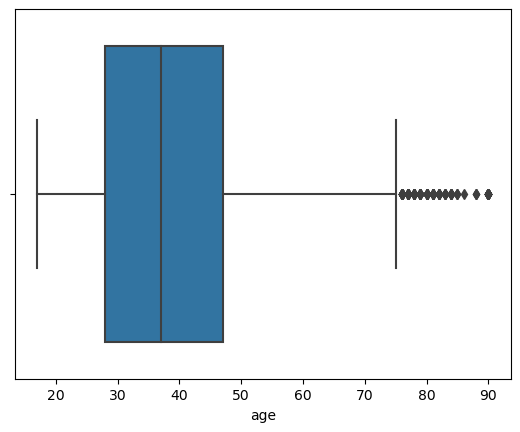

In [61]:
sns.boxplot(data=df, x='age')

In [62]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

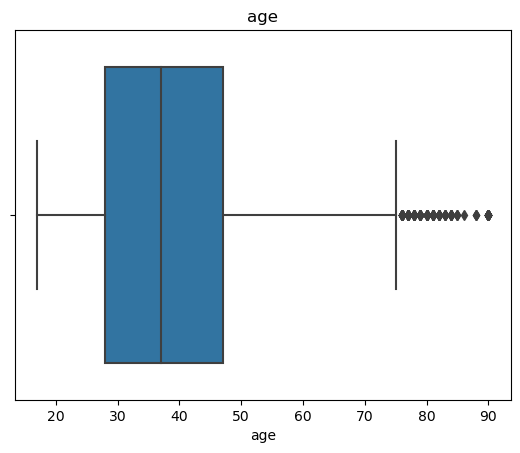

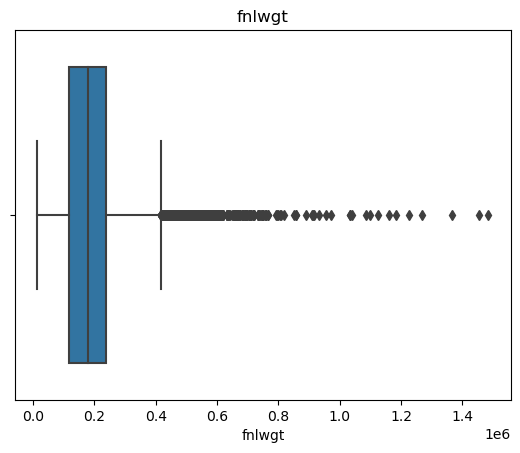

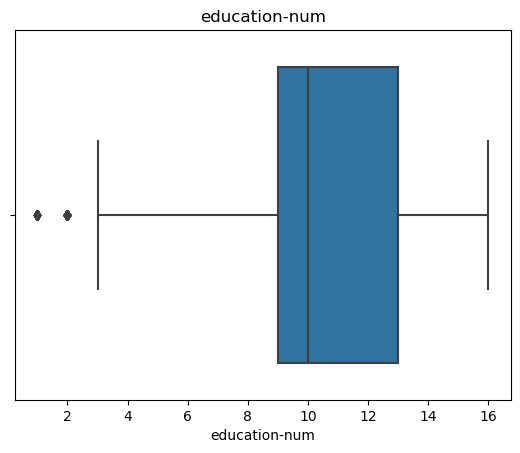

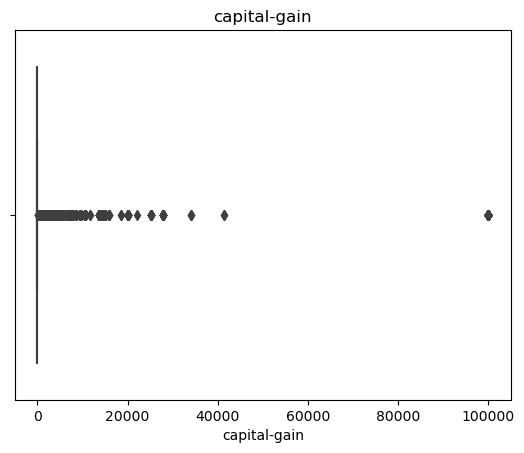

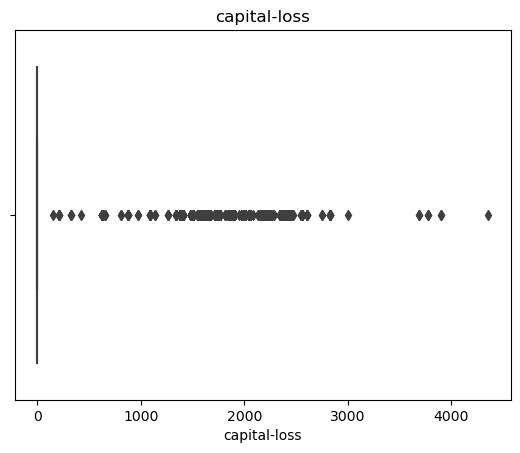

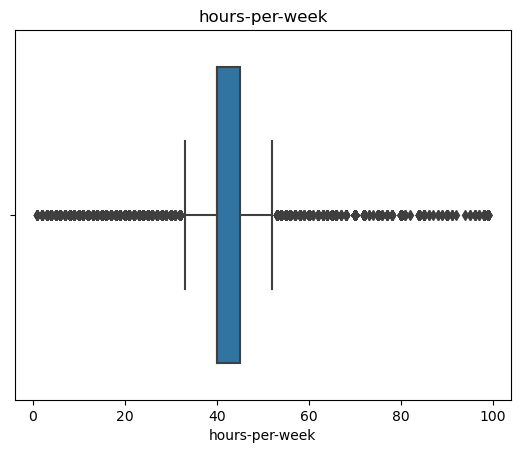

In [33]:
for col in df.columns:
    if df[col].dtype != 'object':
        sns.boxplot(data=df, x=col)
        plt.title(col)
        plt.show()

In [65]:
out_col=[]

for col in df.columns:
    if df[col].dtype != 'object':
        out_col.append(col)
    

In [67]:
print(out_col)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [68]:
for col in out_col:
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    
    LL = Q1-1.5*IQR
    UL = Q3+1.5*IQR
    
    df = df[(df[col]>=LL) & (df[col]<=UL)]

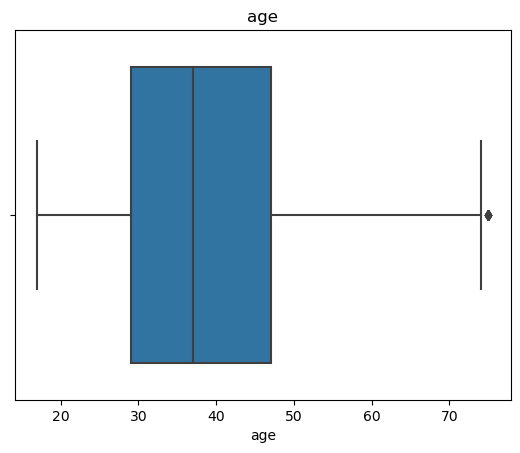

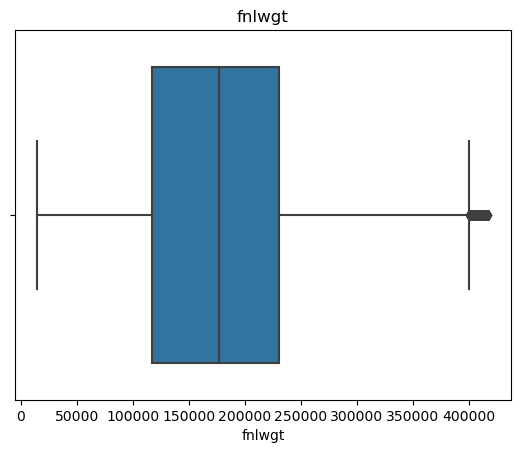

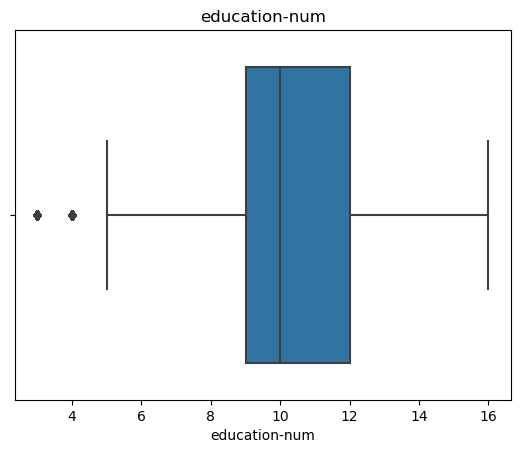

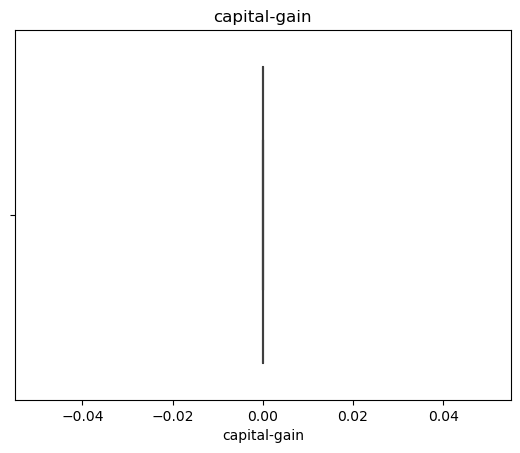

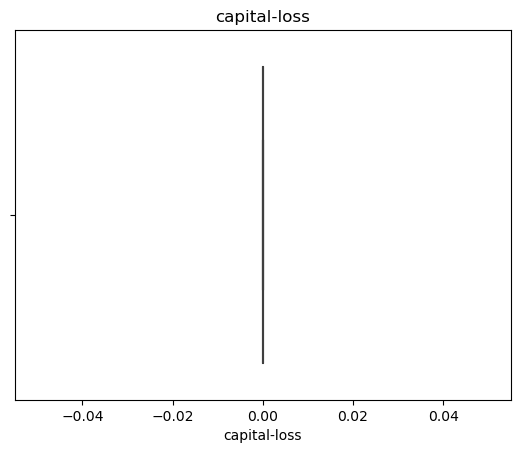

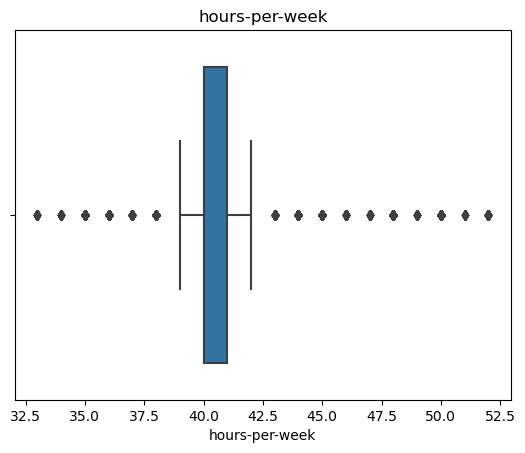

In [69]:
for col in df.columns:
    if df[col].dtype != 'object':
        sns.boxplot(data=df, x=col)
        plt.title(col)
        plt.show()

In [71]:
df['capital-loss'].unique()

array([0], dtype=int64)

In [72]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [75]:
df.drop(columns={'capital-gain','capital-loss'}, inplace=True)

## Checking for collinearity

In [73]:
# single
# Multi-colinearity

In [76]:
df.corr()

C:\Users\Dell1\AppData\Local\Temp\ipykernel_16796\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,education-num,hours-per-week
age,1.000000,-0.072423,0.004677,0.044904
fnlwgt,-0.072423,1.000000,-0.036239,-0.019828
education-num,0.004677,-0.036239,1.000000,0.127261
hours-per-week,0.044904,-0.019828,0.127261,1.000000


C:\Users\Dell1\AppData\Local\Temp\ipykernel_16796\3512116964.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


<Axes: >

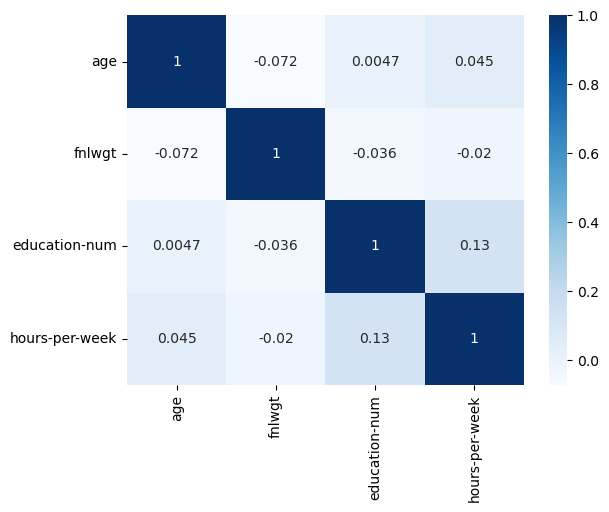

In [78]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

## Encoding Data

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
le = LabelEncoder()

In [81]:
df['workclass'] = le.fit_transform(df['workclass'])

In [83]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,annual_income
2,38,2,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,2,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,2,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,2,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
7,52,4,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K


In [84]:
for col in df.columns:
    
    if df[col].dtype == 'object':
        
        df[col] = le.fit_transform(df[col])

In [85]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,annual_income
2,38,2,215646,10,9,0,5,1,4,1,40,37,0
3,53,2,234721,1,7,2,5,0,2,1,40,37,0
4,28,2,338409,8,13,2,9,5,2,0,40,4,0
5,37,2,284582,11,14,2,3,5,4,0,40,37,0
7,52,4,209642,10,9,2,3,0,4,1,45,37,1


## Checking for multicolinearity

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
x = df.drop('annual_income', axis=1)

In [90]:
y = df['annual_income']

In [91]:
vif_dataframe = pd.DataFrame()
vif_dataframe['Columns']=x.columns
vif_dataframe['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,Columns,VIF
0,age,11.737920
1,workclass,6.231112
2,fnlwgt,5.138466
3,education,10.374643
4,education-num,21.390058
5,marital-status,3.919512
6,occupation,3.037670
7,relationship,2.638370
8,race,19.186038
9,sex,4.708494


In [92]:
x.drop('hours-per-week',axis=1, inplace=True)

In [93]:
vif_dataframe = pd.DataFrame()
vif_dataframe['Columns']=x.columns
vif_dataframe['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,Columns,VIF
0,age,10.540336
1,workclass,6.088634
2,fnlwgt,4.978778
3,education,10.273442
4,education-num,19.442876
5,marital-status,3.825423
6,occupation,3.011012
7,relationship,2.549775
8,race,17.551274
9,sex,4.412931


In [94]:
x.drop('native-country', axis=1, inplace=True)

In [95]:
vif_dataframe = pd.DataFrame()
vif_dataframe['Columns']=x.columns
vif_dataframe['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,Columns,VIF
0,age,9.720949
1,workclass,6.020136
2,fnlwgt,4.942360
3,education,9.989574
4,education-num,18.322125
5,marital-status,3.731373
6,occupation,3.002797
7,relationship,2.446453
8,race,15.046853
9,sex,4.301757


In [96]:
x.drop('education-num', axis=1, inplace=True)

In [97]:
vif_dataframe = pd.DataFrame()
vif_dataframe['Columns']=x.columns
vif_dataframe['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,Columns,VIF
0,age,9.146051
1,workclass,5.941930
2,fnlwgt,4.905206
3,education,7.937125
4,marital-status,3.651743
5,occupation,2.909698
6,relationship,2.433642
7,race,14.073546
8,sex,4.290725


In [98]:
x.drop('race', axis=1, inplace=True)

In [99]:
vif_dataframe = pd.DataFrame()
vif_dataframe['Columns']=x.columns
vif_dataframe['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,Columns,VIF
0,age,7.877083
1,workclass,5.712298
2,fnlwgt,4.743171
3,education,7.328984
4,marital-status,3.566716
5,occupation,2.880216
6,relationship,2.373763
7,sex,4.039807


In [100]:
x

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex
2,38,2,215646,10,0,5,1,1
3,53,2,234721,1,2,5,0,1
4,28,2,338409,8,2,9,5,0
5,37,2,284582,11,2,3,5,0
7,52,4,209642,10,2,3,0,1
...,...,...,...,...,...,...,...,...
32554,53,2,321865,11,2,3,0,1
32555,22,2,310152,13,4,10,1,1
32556,27,2,257302,6,2,12,5,0
32557,40,2,154374,10,2,6,0,1


In [101]:
y

2        0
3        0
4        0
5        0
7        1
        ..
32554    1
32555    0
32556    0
32557    1
32558    0
Name: annual_income, Length: 18445, dtype: int32

## Splitting data

In [104]:
from sklearn.model_selection import train_test_split

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.75, random_state=100)

## Model Building

## Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
lo_model = LogisticRegression()

In [111]:
lo_model.fit(x_train, y_train)

LogisticRegression()

In [112]:
y_pred_lo = lo_model.predict(x_test)

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
accuracy_score(y_test, y_pred_lo)

0.7950997398091935

## Desicion Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
dt_model = DecisionTreeClassifier()

In [117]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [118]:
y_pred_dt = dt_model.predict(x_test)

In [119]:
accuracy_score(y_test, y_pred_dt)

0.7784041630529055

## Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rf_model = RandomForestClassifier()

In [127]:
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [128]:
y_pred_rf = rf_model.predict(x_test)

In [129]:
accuracy_score(y_test, y_pred_rf)

0.8304423243712056